In [1]:
from PIL import Image
import os.path
import glob
import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

font_path = os.getcwd() + '/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

%matplotlib inline


def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8): 
    try: 
        n = np.fromfile(filename, dtype) 
        img = cv2.imdecode(n, flags) 
        return img 
    except Exception as e: 
        print(e) 
        return None
def imwrite(filename, img, params=None): 
    try: 
        ext = os.path.splitext(filename)[1] 
        result, n = cv2.imencode(ext, img, params)
        if result:
            with open(filename, mode='w+b') as f:
                n.tofile(f)
            return True
        else:
            return False
    except Exception as e:
        print(e) 
        return False

def imshow(tit, image) :
    plt.title(tit,fontproperties=fontprop)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()


def ocr(x):
    filename = x
    image = Image.open(filename)
    pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    text = image_to_string(image, lang="kor")
    return text
def ocrImg(img):
    pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    text = image_to_string(img, lang="kor")
    return text

def fitSize(Xmax,Ymax,src):
    ratio = src.shape[1]/src.shape[0] #가로/세로 비율
    height = src.shape[0]
    print(ratio)
    src = cv2.resize(src,dsize=(Xmax,Ymax))
    affine_mat = np.array([[1,0,0],[0,1/ratio,0]]).astype(np.float32)
    src = cv2.warpAffine(src,affine_mat,(0,0)) #(0,0) 부분은 이미지 사이즈를 뜻하는데 잘 조절하지 않고 쓴다.
    return src

In [2]:
results = []
cnt = 0
def on_mouse(event, x, y, flags, param):
    global src_pts
    global cnt
    src_pts[cnt, :] = np.array([x, y]).astype(np.float32) #마우스 클릭한 위치를 얻어서 넣음
    cnt+=1
    print(src_pts.shape)

files = glob.glob('*.jpg')
for x in files:
    if os.path.isdir(x):             # 디렉터리인가?
        pass
    else:
        print(x)
        src = cv2.imread(x)
        src = fitSize(300,300,src)
        cv2.imshow('12',src)
        cv2.waitKey(10)
        break;
cv2.destroyAllWindows()

KakaoTalk_20200804_191001351_01.jpg
1.0


In [3]:
src = cv2.imread('sample.jpg')
cv2.imshow('src',src)

while True:
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

# 마우스 클릭시 책장 좌표 저장

In [4]:
src = cv2.imread('sample.jpg')
img_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src = fitSize(400,400,src)
cv2.imshow('src',src)

results = []
cnt = 0
src_pts = np.zeros([0, 2], dtype=np.int32)
#src_pts = []
#src_pts = src_pts.astype(np.float32)

def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        global src_pts
        global cnt
        #src_pts[cnt, :] = np.array([x, y]).astype(np.float32) #마우스 클릭한 위치를 얻어서 넣음
        src_pts = np.vstack((src_pts,np.array([y, x]).astype(np.float32)))
        #src_pts.append((src_pts,np.array([y, x]).astype(np.int32)))
        cnt+=1
        cv2.circle(src, (x, y), 2, (0, 0, 255), -1)
        cv2.imshow('src', src)

cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)    
    
while True:
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
        
        
#src_pts = np.delete(src_pts, 0,axis=0)

cv2.destroyAllWindows()

1.0


In [5]:
print(src_pts)

[[125. 111.]
 [134. 107.]
 [153. 107.]
 [167. 107.]
 [181. 107.]
 [196. 106.]
 [208. 105.]
 [218. 104.]
 [226. 104.]]


# 책장만 남기고 지우기

[12 58  0]
[ 25 108 255]


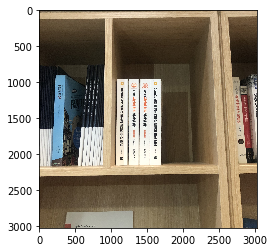

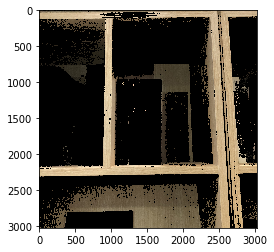

In [63]:
src = cv2.imread('frame2.jpg')
src_pts = src_pts.astype(np.int64)
hueSaturation = np.zeros([src_pts.shape[0], 3], dtype=np.int64)
i =0
for one in src_pts:
    hue = img_hsv[one[0],one[1],0]
    saturation = img_hsv[one[0],one[1],1]
    value = img_hsv[one[0],one[1],2]
    hueSaturation[i,:] = [hue,saturation,value]
    i = i+1   
offset = 3
hsvMin = [np.min(hueSaturation[:,0])-offset,np.min(hueSaturation[:,1])-offset,0]
hsvMax = [np.max(hueSaturation[:,0])+offset,np.max(hueSaturation[:,1])+offset,255]
hsvMin = np.array(hsvMin)
hsvMax = np.array(hsvMax)

print(hsvMin) #15 51 0
print(hsvMax) # 21 102 255
imshow('',src)
hsv= cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, hsvMin, hsvMax)
dst = cv2.bitwise_and(src, src, mask=mask)
imshow('',dst)
# plt.hist(img_hsv[:,:,0].flatten(),bins=50, alpha=0.5)
# plt.hist(img_hsv[:,:,1].flatten(),bins=50, alpha=0.5)

In [64]:
hsvMin = np.array([15,51,0])
hsvMax = np.array([21,102,255])

# 이진화

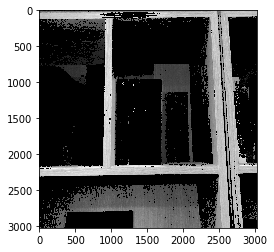

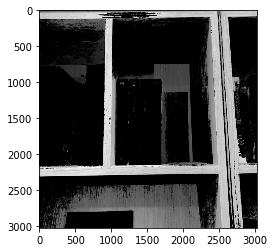

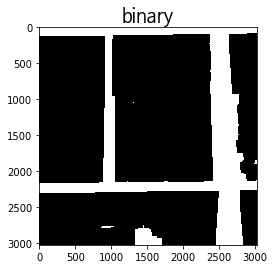

' \nlines = cv2.HoughLinesP(src_bin, 1, math.pi / 180, 20, minLineLength=30, maxLineGap=10)#160개 이상의 점이 지나야 인정한다.\n                                                                                 #minLineLength = 50 , 최소한의 길이가 50\n                                                                                    #한 공간에 직선은 최대 5개\ndst2 = cv2.cvtColor(src_bin, cv2.COLOR_GRAY2BGR)\n\nfor i in range(lines.shape[0]):\n            pt1 = (lines[i][0][0], lines[i][0][1])\n            pt2 = (lines[i][0][2], lines[i][0][3])\n            slope = (pt1[1]-pt2[1])/(pt1[0]-pt2[0])\n            #print(slope)\n            if np.abs(slope)<1:\n                cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)\n\nimshow(\'src\', src)\nimshow(\'dst\', dst2)\n#cv2.imwrite("output.png",dst2)\n'

In [65]:
img_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
imshow('',img_gray)
img_blur = cv2.GaussianBlur(img_gray,(11,11),0)
imshow('',img_blur)
#src_bin = cv2.Canny(img_gray, 50,200)  #캐니 엣지를 구한 후 
_, src_bin = cv2.threshold(img_blur,128,255,cv2.THRESH_BINARY)# | cv2.THRESH_OTSU)
#src_bin=cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11, 5)
#src_bin = cv2.dilate(src_bin,None, iterations=5)
#src_bin = cv2.erode(src_bin,None, iterations=5)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
src_bin = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=10)



imshow('binary',src_bin)
''' 
lines = cv2.HoughLinesP(src_bin, 1, math.pi / 180, 20, minLineLength=30, maxLineGap=10)#160개 이상의 점이 지나야 인정한다.
                                                                                 #minLineLength = 50 , 최소한의 길이가 50
                                                                                    #한 공간에 직선은 최대 5개
dst2 = cv2.cvtColor(src_bin, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            slope = (pt1[1]-pt2[1])/(pt1[0]-pt2[0])
            #print(slope)
            if np.abs(slope)<1:
                cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst2)
#cv2.imwrite("output.png",dst2)
'''

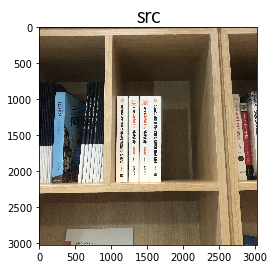

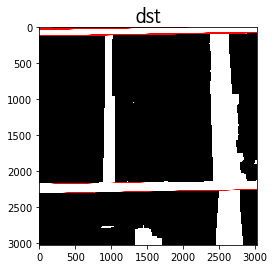

In [66]:
lines = cv2.HoughLinesP(src_bin, 1, math.pi / 180, 50, minLineLength=600, maxLineGap=50)#160개 이상의 점이 지나야 인정한다.
                                                                                 #minLineLength = 50 , 최소한의 길이가 50
                                                                                    #한 공간에 직선은 최대 5개
dst2 = cv2.cvtColor(src_bin, cv2.COLOR_GRAY2BGR)
yList = []
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            slope = (pt1[1]-pt2[1])/(pt1[0]-pt2[0])
            #print(slope)
            if np.abs(slope)<0.02:
                yList.append((lines[i][0][1] + lines[i][0][3])/2)
                cv2.line(dst2, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst2)
#cv2.imwrite("output.png",dst2)

In [67]:
print(np.sort(yList))
county=0
lasty=0
i=0
list = []
for y in yList:
    if np.abs(lasty-y)<2:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-67-de082177bdc0>, line 8)